In [1]:
#Import the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets

In [2]:
#Read the files
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','values']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=col_names, header=None,skipinitialspace=True)

['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']
['acc' 'good' 'unacc' 'vgood']


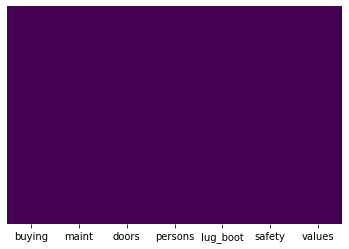

In [3]:
# Plotting missing values in the data set
for column in df:
    print(np.unique(df[column]))
df.replace('?', np.nan, inplace= True)
missing_values = df.isnull()
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

In [4]:
print(df.describe())
print('----------------------------------------------------------')
print(df.info())

       buying  maint doors persons lug_boot safety values
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     3       2      big    low  unacc
freq      432    432   432     576      576    576   1210
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
values      1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None


Text(0.5, 1.0, 'buying vs values')

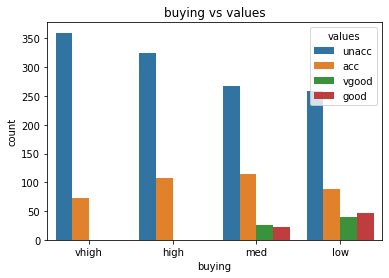

In [5]:
#Plot dataset
sns.countplot(x="buying", hue="values", data=df).set_title('buying vs values')

Text(0.5, 1.0, 'maint vs values')

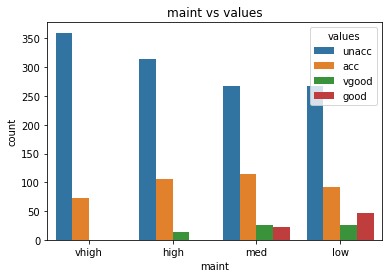

In [6]:
sns.countplot(x="maint", hue="values", data=df).set_title('maint vs values')

Text(0.5, 1.0, 'doors vs values')

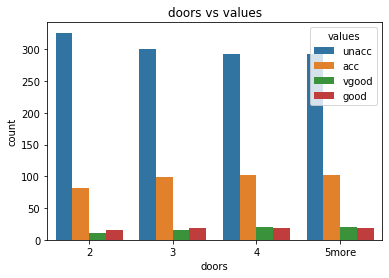

In [7]:
sns.countplot(x="doors", hue="values", data=df).set_title('doors vs values')

Text(0.5, 1.0, 'persons vs values')

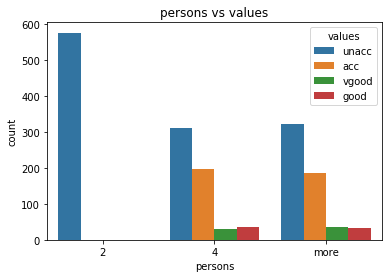

In [8]:
sns.countplot(x="persons", hue="values", data=df).set_title('persons vs values')

Text(0.5, 1.0, 'lug_boot vs values')

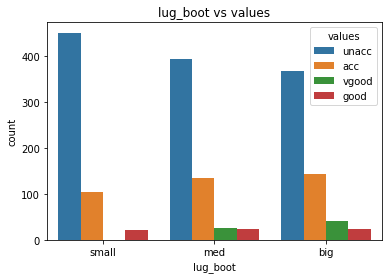

In [9]:
sns.countplot(x="lug_boot", hue="values", data=df).set_title('lug_boot vs values')

Text(0.5, 1.0, 'safety vs values')

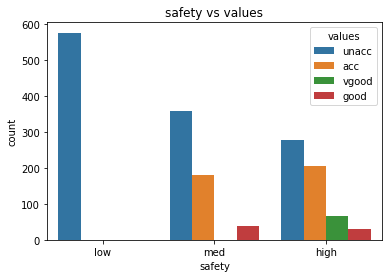

In [10]:
sns.countplot(x="safety", hue="values", data=df).set_title('safety vs values')

In [11]:
def cat_var(df): 
    ordinal1 = {'low':0,'med':1,'high':2,'vhigh':3}
    ordinal2 = {'2':0,'3':1,'4':2,'5more':3}
    ordinal3 = {'2':0,'4':1,'more':2}
    ordinal4 = {'small':0,'med':1,'big':2}
    df['buying'] = df.buying.map(ordinal1)
    df['maint'] = df.maint.map(ordinal1)
    df['safety'] = df.safety.map(ordinal1)
    df['doors'] = df.doors.map(ordinal2)
    df['persons'] = df.persons.map(ordinal3)
    df['lug_boot'] = df.lug_boot.map(ordinal4)
    print(df)
    return df
df = cat_var(df)

      buying  maint  doors  persons  lug_boot  safety values
0          3      3      0        0         0       0  unacc
1          3      3      0        0         0       1  unacc
2          3      3      0        0         0       2  unacc
3          3      3      0        0         1       0  unacc
4          3      3      0        0         1       1  unacc
...      ...    ...    ...      ...       ...     ...    ...
1723       0      0      3        2         1       1   good
1724       0      0      3        2         1       2  vgood
1725       0      0      3        2         2       0  unacc
1726       0      0      3        2         2       1   good
1727       0      0      3        2         2       2  vgood

[1728 rows x 7 columns]


In [12]:
le = LabelEncoder()
df['values'] = le.fit_transform(df['values'])

Text(0.5, 1.0, 'boxplot for distribution')

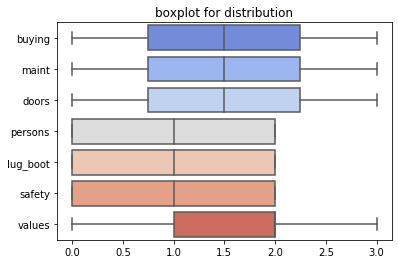

In [13]:
sns.boxplot(data=df,palette='coolwarm',orient='h').set_title('boxplot for distribution')

Text(0.5, 1, 'heatmap for correlation')

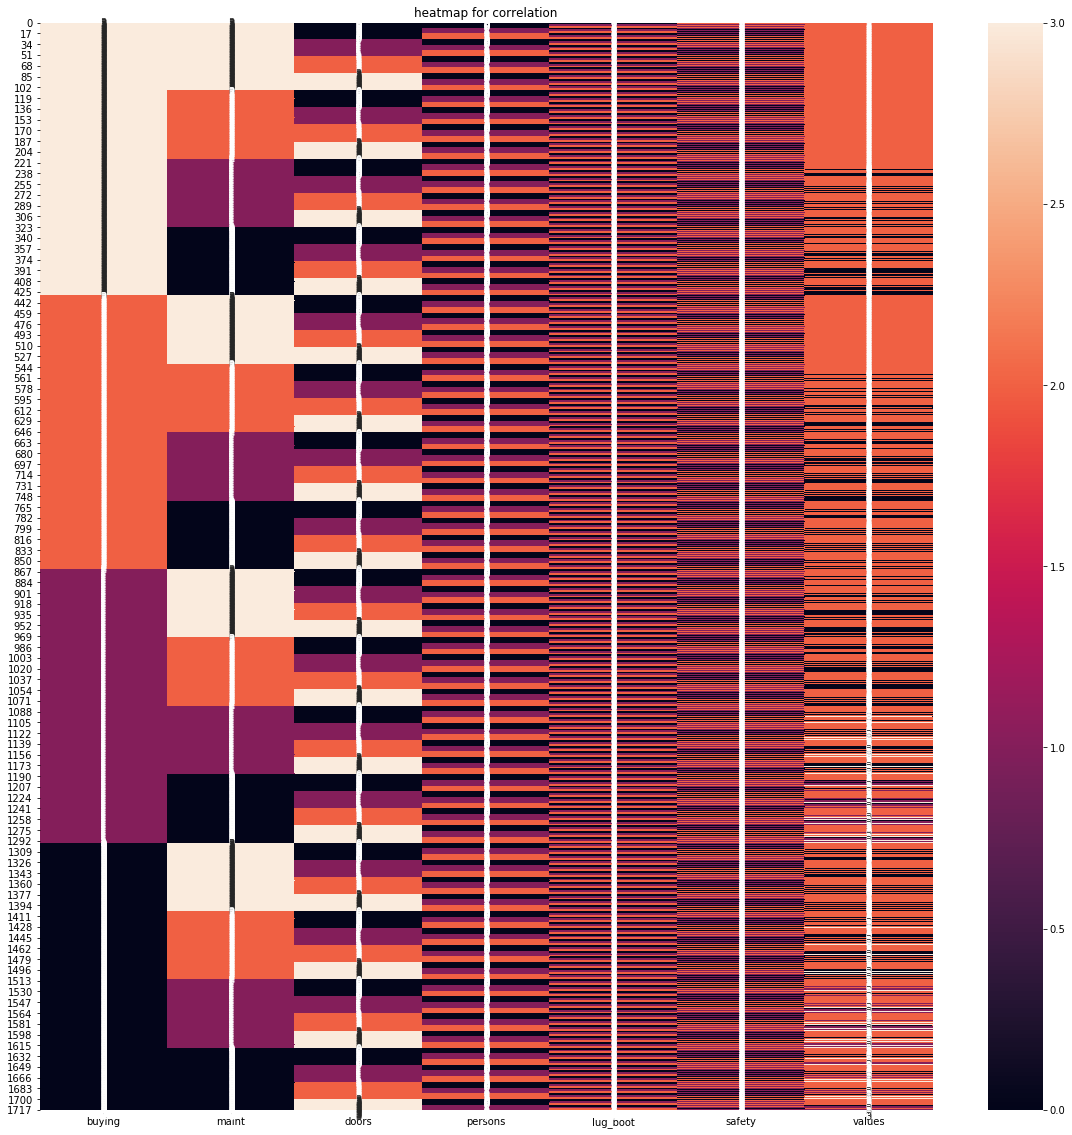

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df, annot=True, fmt="d").set_title('heatmap for correlation')

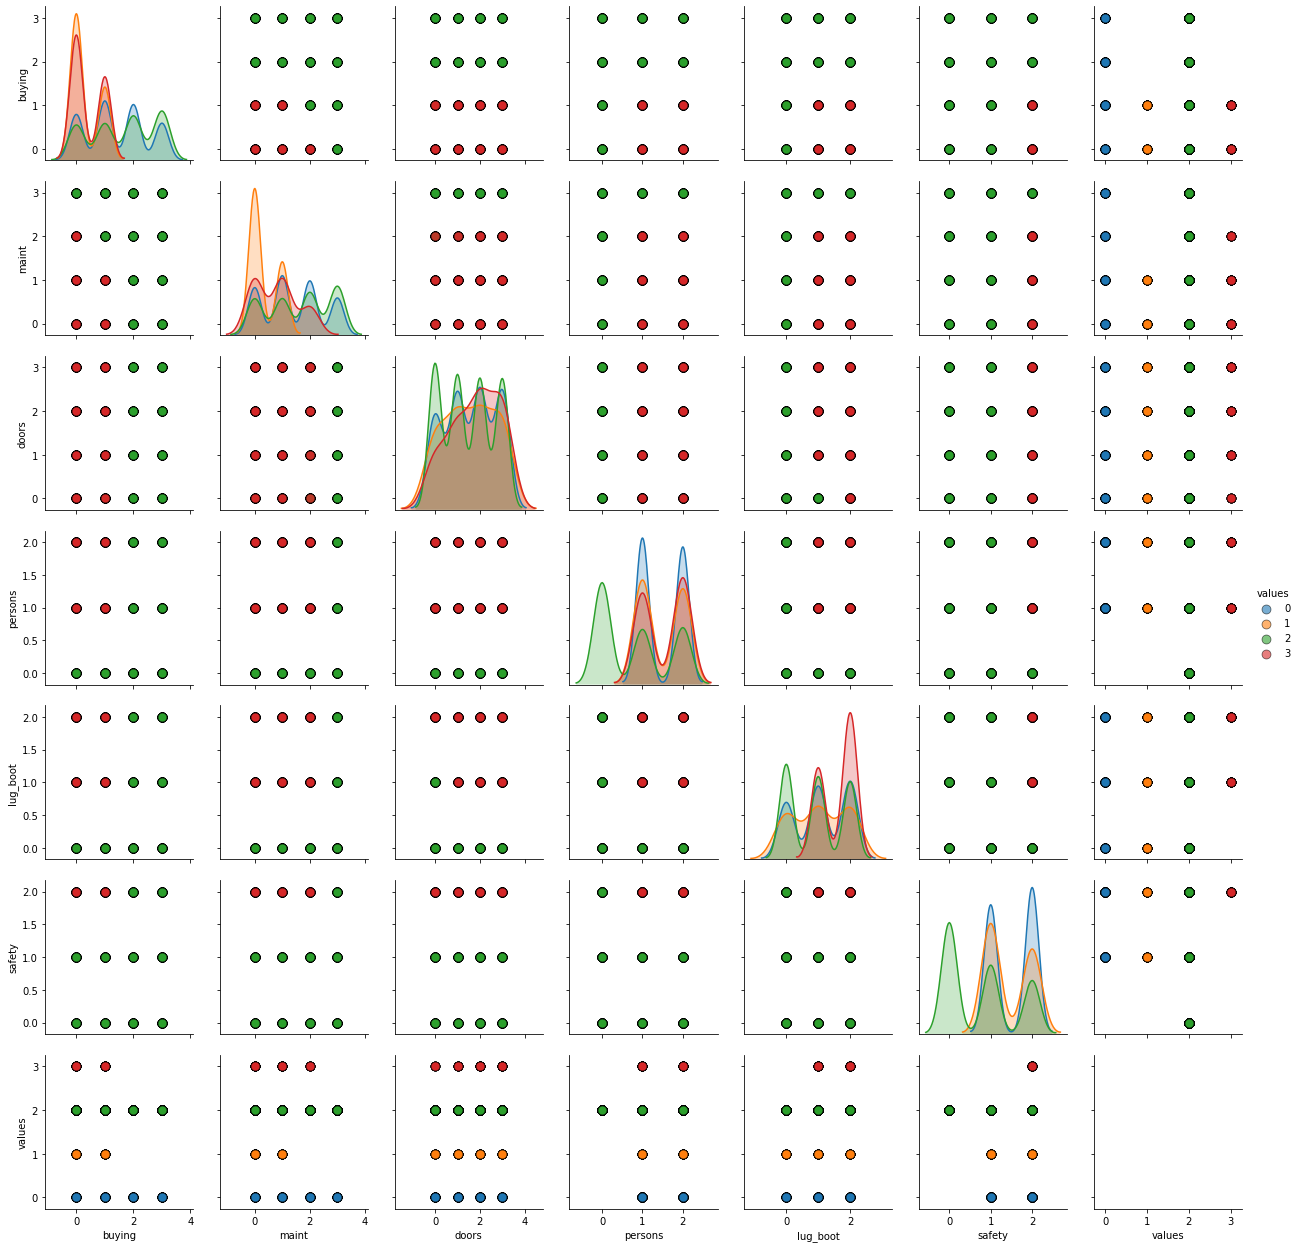

In [16]:
#Data correlation
sns.pairplot(df, hue = 'values', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [17]:
#Separate X and target attributes
X = df.iloc[:,:6]
y = df['values']
print("predictors = \n" ,X)
print("target = \n",y)

predictors = 
       buying  maint  doors  persons  lug_boot  safety
0          3      3      0        0         0       0
1          3      3      0        0         0       1
2          3      3      0        0         0       2
3          3      3      0        0         1       0
4          3      3      0        0         1       1
...      ...    ...    ...      ...       ...     ...
1723       0      0      3        2         1       1
1724       0      0      3        2         1       2
1725       0      0      3        2         2       0
1726       0      0      3        2         2       1
1727       0      0      3        2         2       2

[1728 rows x 6 columns]
target = 
 0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: values, Length: 1728, dtype: int32


In [18]:
#10K fold data Logistic regression model

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=10, shuffle = True, random_state=0)
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X,y)
y_pred = cross_val_predict(model, X, y, cv=kf)

print('==============================TEST-SCORE(LogisticRegression)========================================')
print("Train Accuracy:",accuracy_score(y, y_pred))
print('Train confusion_matrix:\n',confusion_matrix(y, y_pred))

==============================TEST-SCORE(LogisticRegression)========================================
Train Accuracy: 0.8298611111111112
Train confusion_matrix:
 [[ 232    5  143    4]
 [  30   29    8    2]
 [  63   15 1126    6]
 [  16    2    0   47]]


# Without K fold the results are slightly better

In [19]:
model_test = LogisticRegression(solver='lbfgs', multi_class='auto')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify=y)
model_test.fit(X_train,y_train)
y_pred_test = model_test.predict(X_test)

print('==============================TEST-SCORE(LogisticRegression)========================================')
print("Train Accuracy:",accuracy_score(y_test, y_pred_test))
print('Train confusion_matrix:\n',confusion_matrix(y_test, y_pred_test))

==============================TEST-SCORE(LogisticRegression)========================================
Train Accuracy: 0.8208092485549133
Train confusion_matrix:
 [[ 58   2  52   3]
 [  7  12   2   0]
 [ 18   2 342   1]
 [  4   2   0  14]]


# Visulation of train and test data

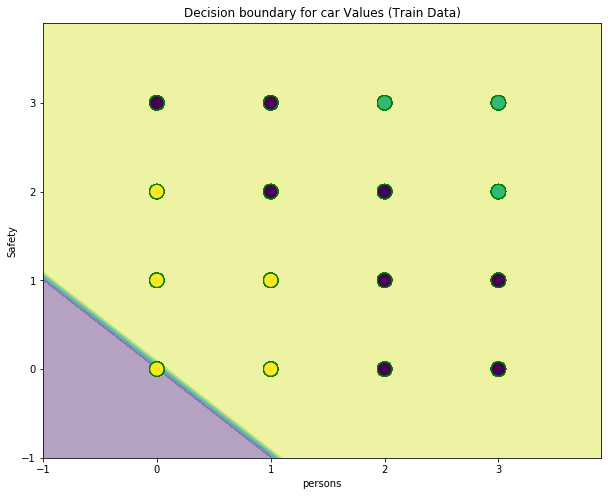

In [20]:
from itertools import product
X_vis=X.iloc[:,:2].values
Y_vis=y
model.fit(X_vis,Y_vis)
x_min,x_max = X_vis[:,0].min() - 1,X_vis[:,0].max()+1
y_min,y_max = X_vis[:,1].min() - 1,X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf in zip(product([0, 1], [0, 1]), [model]):
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.4)
    axarr.scatter(X_vis[:, 0], X_vis[:, 1], c=Y_vis, s=200, edgecolor='g',)
    axarr.set_xlabel('persons')
    axarr.set_ylabel('Safety')
    axarr.set_title('Decision boundary for car Values (Train Data)')
    axarr.set_xlim(xx.min(),xx.max())
    axarr.set_ylim(yy.min(),yy.max())
    plt.show()


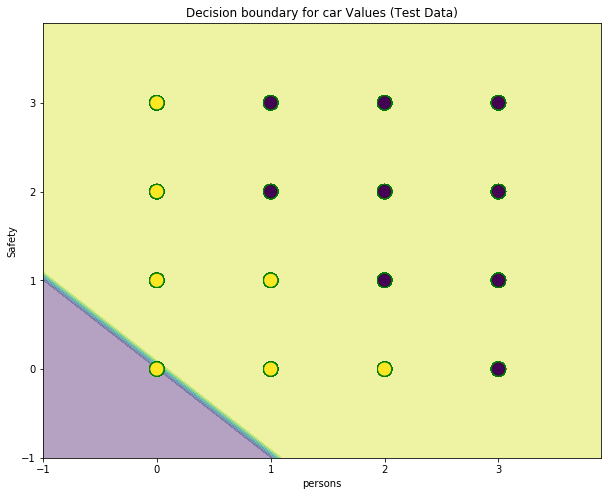

In [21]:
from itertools import product
X_vis=X.iloc[:,:2].values
Y_vis=y
model.fit(X_vis,Y_vis)
x_min,x_max = X_vis[:,0].min() - 1,X_vis[:,0].max()+1
y_min,y_max = X_vis[:,1].min() - 1,X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf in zip(product([0, 1], [0, 1]), [model]):
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.4)
    axarr.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred, s=200, edgecolor='g',)
    axarr.set_xlabel('persons')
    axarr.set_ylabel('Safety')
    axarr.set_title('Decision boundary for car Values (Test Data)')
    axarr.set_xlim(xx.min(),xx.max())
    axarr.set_ylim(yy.min(),yy.max())
    plt.show()

In [22]:
#Predict and display the class label of a car with following attributes : 
# buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,high]
new_df = pd.DataFrame(columns=['buying','maint','doors','persons','lug_boot','safety'])
new_df = new_df.append({'buying' : 'vhigh' ,'maint' : 'low','doors' : '4' ,'persons' : 'more','lug_boot' : 'small','safety' : 'high'},ignore_index=True)
df = cat_var(new_df)
new_df.head()

   buying  maint  doors  persons  lug_boot  safety
0       3      0      2        2         0       2


,buying,maint,doors,persons,lug_boot,safety
0,3,0,2,2,0,2


In [23]:
model.fit(X,y)
y_pred_sample = model.predict(new_df)

In [24]:
le.inverse_transform(y_pred_sample)

array(['acc'], dtype=object)

# So the new data is predicted to be acceptable